# INDIAN START-UP FUNDING ANALYSIS

# Import the Modules
 we are going to import the necessary modules needed for the analysis of this data such pandas, numpy, matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the CSV files

in this analysis the files needed is divided across four years from 2018 - 2021, we are going to import using the pandas dataframe ranging from yearA to yearD

In [2]:
yearA=pd.read_csv('startup_funding2018.csv')
yearB=pd.read_csv('startup_funding2019.csv')
yearC=pd.read_csv('startup_funding2020.csv')
yearD=pd.read_csv('startup_funding2021.csv')

# Creating and renaming  columns

we are going to create a new column which tells the year e.g yearA is going to contain a Year column of 2018 only, while yearB contains 2019 only. the essense is to make our data distnguishable when we merge all the files from the differnt years after cleaning. We are also going rename our columns form yearA to match other columns.
columns we are using: "Company, Founded, Sector, What it does, Founders, Investor, Amount($),Stage,HeadQuarter"

In [3]:
#create the Year column 
yearA['Year'] = 2018
yearB['Year'] = 2019
yearC['Year'] = 2020
yearD['Year'] = 2021

In [4]:
#columns in yearA:
yearA.keys()

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company', 'Year'],
      dtype='object')

In [5]:
#Renaming the columns in yearA 
yearA.rename(columns={'Company Name':'Company/Brand', 'Industry':'Sector', 'Round/Series':'Stage', 'Amount':'Amount($)', 'Location':'HeadQuarter',
       'About Company':'What it does'},inplace=True)

In [6]:
yearA.rename(columns={'HeadQuarters':'HeadQuarter'},inplace=True)

In [7]:
yearA.keys()

Index(['Company/Brand', 'Sector', 'Stage', 'Amount($)', 'HeadQuarter',
       'What it does', 'Year'],
      dtype='object')

In [8]:
yearB.keys()

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'Year'],
      dtype='object')

In [9]:
yearC.keys()

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'Unnamed: 9', 'Year'],
      dtype='object')

In [10]:
yearD.keys()

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'Year'],
      dtype='object')

In [11]:
#notice in yearC we have an 'unnamed: 9' column, so we are going to look into it to see what it entails
yearC['Unnamed: 9'].value_counts()

Pre-Seed      1
Seed Round    1
Name: Unnamed: 9, dtype: int64

In [12]:
#so as we can see it pretty much doesn't contain anything useful, we remove it.
yearC.drop(columns=['Unnamed: 9'], inplace=True)

In [13]:
yearC.keys()

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'Year'],
      dtype='object')

# Cleaning the Amount column

The amount column have to be cleaned across all years. we have to remove the rupees sign and then convert them to dollars as the values have to be in dollars.we have to remove the commas and then replace the null and empty values with undisclosed.

In [14]:
#remove the rupees sign and commas
yearA['Amount($)']=yearA['Amount($)'].str.strip('₹').str.replace(',','').str.replace('—','Undisclosed')

#before we convert to dollars, we will first bring out the rows already in dollars, and those undisclosed
#then differentiate them from the full list(columns) to get our columns in rupees which we will then convert

amount_with_dolls=yearA['Amount($)'][yearA['Amount($)'].str.contains('\$')].index

In [15]:
amount_with_undisclosed=yearA['Amount($)'][yearA['Amount($)'].str.contains('Undisclosed')].index
yearA.loc[amount_with_undisclosed]['Amount($)']

4      Undisclosed
8      Undisclosed
9      Undisclosed
10     Undisclosed
11     Undisclosed
          ...     
510    Undisclosed
512    Undisclosed
515    Undisclosed
518    Undisclosed
522    Undisclosed
Name: Amount($), Length: 148, dtype: object

In [16]:
amount_with_rupees=list(set(yearA.index).difference(set(amount_with_dolls).union(amount_with_undisclosed)))

#converting to the ruppees to dollars using the exchange rate of 1 rupee to 0.013 dollar
yearA['Amount($)'].loc[amount_with_rupees]= yearA.loc[amount_with_rupees]['Amount($)'].astype(float)*0.013

C:\Users\emman\AppData\Local\Temp\ipykernel_3964\3341287915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearA['Amount($)'].loc[amount_with_rupees]= yearA.loc[amount_with_rupees]['Amount($)'].astype(float)*0.013


In [17]:
yearA

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3250.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,520000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,845000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,26000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,Undisclosed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,2925000.0,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,Undisclosed,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,97.5,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,455000.0,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018


In [18]:
# Removing the dollar sign 
yearA['Amount($)'].loc[amount_with_dolls] = yearA.loc[amount_with_dolls]['Amount($)'].str.strip('$')

C:\Users\emman\AppData\Local\Temp\ipykernel_3964\3295270219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearA['Amount($)'].loc[amount_with_dolls] = yearA.loc[amount_with_dolls]['Amount($)'].str.strip('$')


In [19]:
#removing the dollar sign and the comma seperator in amount from other years

yearB['Amount($)']=yearB['Amount($)'].str.strip('$').str.replace(',','')
yearC['Amount($)']=yearC['Amount($)'].str.strip('$').str.replace(',','')
yearD['Amount($)']=yearD['Amount($)'].str.strip('$').str.replace(',','')

In [20]:
cols = 'Company/Brand, Founded, HeadQuarter, Sector, What it does, Founders, Investor, Amount($), Stage'.split(', ') + ['Year']

In [21]:
# Merging all the datasets
all_data = pd.concat([yearA, yearB[cols]])
all_data = pd.concat([all_data, yearC[cols]])
all_data = pd.concat([all_data, yearD[cols]])

In [22]:
#resetting the index
all_data.reset_index(drop=True, inplace=True)

In [23]:
#number of undisclosed funding per year
all_data[all_data['Amount($)'] == 'Undisclosed']['Year'].value_counts()

2020    243
2018    148
2021    116
2019     12
Name: Year, dtype: int64

In [24]:
all_data.dtypes

Company/Brand    object
Sector           object
Stage            object
Amount($)        object
HeadQuarter      object
What it does     object
Year              int64
Founded          object
Founders         object
Investor         object
dtype: object

In [25]:
all_data['Amount($)']=all_data['Amount($)'].replace('Undiclsosed','Undisclosed').replace('Undislosed','Undisclosed').replace('undisclosed','Undisclosed')



In [26]:
#Dropping wrong rows in the amount column
#all_data[all_data['Amount($)']=='800000000 to $850000000']
all_data.drop([1080,2816,1768,1781,1912,1926,2215], inplace=True)
all_data.drop([1927,2828], inplace=True)
all_data.drop(2208, inplace=True)
all_data.drop([2221,2347], inplace=True)
all_data.drop(2807, inplace=True)
all_data.drop(2818, inplace=True)
all_data.drop(1087, inplace=True)


#Disclosed funding: Amount that are not undisclosed, convert them float
disclosed_funding=all_data[all_data['Amount($)']!='Undisclosed']
disclosed_funding['Amount($)'].astype(float)

0           3250.0
1         520000.0
2         845000.0
3          26000.0
5          20800.0
           ...    
2874     3000000.0
2875    20000000.0
2876    55000000.0
2877    26000000.0
2878     8000000.0
Name: Amount($), Length: 2321, dtype: float64

In [27]:
all_data

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3250.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,520000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,845000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,26000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,Undisclosed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Staffing & Recruiting,Pre-series A,3000000,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2875,Vahdam,Food & Beverages,Series D,20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC
2876,Leap Finance,Financial Services,Series C,55000000,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2877,CollegeDekho,EdTech,Series B,26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [28]:
#splitting the sector to two seperate columns
all_data[['Sector', 'Subsector']] = all_data['Sector'].str.split(',',1,expand=True)

In [29]:
all_data

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founded,Founders,Investor,Subsector
0,TheCollegeFever,Brand Marketing,Seed,3250.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,"Event Promotion, Marketing, Sponsorship, Tick..."
1,Happy Cow Dairy,Agriculture,Seed,520000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,Farming
2,MyLoanCare,Credit,Series A,845000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,"Financial Services, Lending, Marketplace"
3,PayMe India,Financial Services,Angel,26000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,FinTech
4,Eunimart,E-Commerce Platforms,Seed,Undisclosed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,"Retail, SaaS"
...,...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Staffing & Recruiting,Pre-series A,3000000,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,None
2875,Vahdam,Food & Beverages,Series D,20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC,None
2876,Leap Finance,Financial Services,Series C,55000000,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,None
2877,CollegeDekho,EdTech,Series B,26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",None


In [30]:
#Replacing the cells with similar values in the Sector column
all_data['Sector']=all_data['Sector'].replace('Edtech','EdTech').replace('Fintech','FinTech').replace('Agriculture','AgriTech').replace('Food & Beverages', 'Food and Beverages')
all_data['Sector']=all_data['Sector'].replace('Financial Services','FinTech').replace('Healthcare','HealthTech').replace('HealthCare','HealthTech').replace('AI startup', 'AI').replace('Information Services','Information Technology & Services')
all_data['Sector']=all_data['Sector'].replace('Healthtech','HealthTech').replace('Finance','FinTech').replace('Health Care','HealthTech').replace('Logistics & Supply Chain','Logistics').replace('Food Industry','FoodTech').replace('Foodtech','FoodTech')
all_data['Sector']=all_data['Sector'].replace('—','Undisclosed').replace('SaaS startup','SaaS').replace('Health','HealthTech').replace('Ecommerce','E-Commerce').replace('Tech Startup', 'Tech').replace('Mobility','Transportation')
all_data['Sector']=all_data['Sector'].replace('SaaS','Tech').replace('Artificial Intelligence','AI').replace('Food and Beverage','Food and Beverages').replace('Information Technology','Information Technology & Services').replace('Internet','Tech')
all_data['Sector']=all_data['Sector'].replace('Apps','Tech').replace('Computer Software','Tech').replace('E-commerce','E-Commerce').replace('Agritech','AgriTech').replace('Hospital & Health Care','HealthTech').replace('Food','Foodtech')
all_data['Sector']=all_data['Sector'].replace('Cosmetics','Consumer Goods').replace('Tech company','Tech').replace('Automobile','Automotive').replace('Computer software','Tech').replace('Apparel & Fashion','Fashion').replace('Education','EdTech')
all_data['Sector']=all_data['Sector'].replace('Social Media','Media').replace('Digital Media','Media').replace('IT','Information Technology & Services').replace('IoT','AI').replace('Software','Tech').replace('Industrial Automation','AI').replace('Technology','Tech')
all_data['Sector']=all_data['Sector'].replace('Information Technology & Services','InfoTech & Services')


In [31]:
#Cleaning and replacing with appropriate name in the HeadQuarter column e.g bangalore and bengaluru are both same
#we will turn the column to a one word column

#Bangalore
all_data['HeadQuarter']=all_data['HeadQuarter'].replace('Bengaluru, Karnataka, India','Bangalore').replace('Bangalore, Karnataka, India','Bangalore').replace('Bangalore City, Karnataka, India','Bangalore').replace('Bengaluru','Bangalore')
#Mumbai
all_data['HeadQuarter']=all_data['HeadQuarter'].replace('Mumbai, Maharashtra, India','Mumbai')
#Gurugram
all_data['HeadQuarter']=all_data['HeadQuarter'].replace('Gurgaon, Haryana, India','Gurugram').replace('Gurgaon','Gurugram')
#Delhi
all_data['HeadQuarter']=all_data['HeadQuarter'].replace('New Delhi','Delhi').replace('New Delhi, Delhi, India','Delhi').replace('Delhi, Delhi, India','Delhi')
#Chennai
all_data['HeadQuarter']=all_data['HeadQuarter'].replace('Chennai, Tamil Nadu, India','Chennai')
#Pune
all_data['HeadQuarter']=all_data['HeadQuarter'].replace('Pune, Maharashtra, India','Pune')
#Noida and Bhopal
all_data['HeadQuarter']=all_data['HeadQuarter'].replace('Noida, Uttar Pradesh, India','Noida').replace('Bhopal, Madhya Pradesh, India','Bhopal')
#Hyderabad and kochi
all_data['HeadQuarter']=all_data['HeadQuarter'].replace('Hyderabad, Andhra Pradesh, India','Hyderabad').replace('Cochin','Kochi').replace('Kochi, Kerala, India','Kochi')
#Ahmedabad
all_data['HeadQuarter']=all_data['HeadQuarter'].replace('Ahmedabad, Gujarat, India','Ahmedabad').replace('Ahmadabad','Ahmedabad').replace('Trivandrum, Kerala, India','Trivandrum')
#Jaipur
all_data['HeadQuarter']=all_data['HeadQuarter'].replace('Jaipur, Rajasthan, India','Jaipur').replace('Jodhpur','Jaipur').replace('Jaipur, Rajastan','Jaipur')
#Kolkata and thane
all_data['HeadQuarter']=all_data['HeadQuarter'].replace('Kolkata, West Bengal, India','Kolkata').replace('Thane, Maharashtra, India','Thane')
#Haryana and Indore
all_data['HeadQuarter']=all_data['HeadQuarter'].replace('Haryana, Haryana, India','Haryana').replace('Indore, Madhya Pradesh, India','Indore')
#Outside India
all_data['HeadQuarter']=all_data['HeadQuarter'].replace('California','Outside India').replace('Singapore').replace('San Francisco','Outside India').replace('San Francisco, California, United States','Outside India')
all_data['HeadQuarter']=all_data['HeadQuarter'].replace('San Francisco Bay Area, Silicon Valley, West Coast','Outside India').replace('New York','Outside India').replace('New York, United States','Outside India')

In [32]:
#cleaning the stage column to reflect the correct stages of funding in a start-up
all_data['Stage']=all_data['Stage'].replace('Debt','Debt Financing').replace('Pre series A','Pre-series A').replace('Seed Round','Seed')
all_data['Stage']=all_data['Stage'].replace('Seed round','Seed').replace('Seed funding','Seed').replace('Pre seed round','Pre-seed').replace('Seed+','Seed')
all_data['Stage']=all_data['Stage'].replace('Pre-Series B','Pre-series B').replace('Pre series B','Pre-series B').replace('Pre Series A','Pre-series A')
all_data['Stage']=all_data['Stage'].replace('Pre-series A1','Pre-series A').replace('Series D1','Series D').replace('Pre series A1','Pre-series A')
all_data['Stage']=all_data['Stage'].replace('Series A-1','Series A')

In [33]:
#cleaning the investors column
all_data['Investor']=all_data['Investor'].replace('Sequoia Surge','Sequoia Capital India').replace('Sequoia Capital','').replace('Sequoia Surge','Sequoia Capital India').replace('Sequoia India','Sequoia Capital India')
all_data['Investor']=all_data['Investor'].replace('','Undisclosed')

In [67]:
#all_data['Sector'].value_counts().head(40)
#all_data['HeadQuarter'].value_counts().head(50)
#all_data['Stage'].value_counts().head(50)
#all_data['Investor'].value_counts().head(50).sort_values(ascending=False)

In [35]:
all_data

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founded,Founders,Investor,Subsector
0,TheCollegeFever,Brand Marketing,Seed,3250.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,"Event Promotion, Marketing, Sponsorship, Tick..."
1,Happy Cow Dairy,AgriTech,Seed,520000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,Farming
2,MyLoanCare,Credit,Series A,845000.0,Gurugram,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,"Financial Services, Lending, Marketplace"
3,PayMe India,FinTech,Angel,26000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,FinTech
4,Eunimart,E-Commerce Platforms,Seed,Undisclosed,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,"Retail, SaaS"
...,...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Staffing & Recruiting,Pre-series A,3000000,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,None
2875,Vahdam,Food and Beverages,Series D,20000000,Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC,None
2876,Leap Finance,FinTech,Series C,55000000,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,None
2877,CollegeDekho,EdTech,Series B,26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",None


In [36]:
#drop unimportant columns eg founded
#all_data.drop(columns=['Founded'], inplace=True)

In [37]:
#remove the amount undisclosed from our Dataset, 
Undisclosed_funding=all_data[all_data['Amount($)']=='Undisclosed']

Final_data=all_data[all_data['Amount($)']!='Undisclosed']

In [38]:
#resetting the index
Final_data.reset_index(drop=True, inplace=True)
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2321 non-null   object
 1   Sector         2305 non-null   object
 2   Stage          1599 non-null   object
 3   Amount($)      2315 non-null   object
 4   HeadQuarter    2227 non-null   object
 5   What it does   2321 non-null   object
 6   Year           2321 non-null   int64 
 7   Founded        1772 non-null   object
 8   Founders       1929 non-null   object
 9   Investor       1860 non-null   object
 10  Subsector      302 non-null    object
dtypes: int64(1), object(10)
memory usage: 199.6+ KB


In [39]:
Final_data['Amount($)']=Final_data['Amount($)'].astype(float)

C:\Users\emman\AppData\Local\Temp\ipykernel_3964\1548984802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_data['Amount($)']=Final_data['Amount($)'].astype(float)


In [107]:
Final_data.describe()

,Amount($),Year
count,2.315000e+03,2321.000000
mean,1.201321e+08,2020.096941
std,3.440737e+09,1.063742
min,9.600000e+00,2018.000000
25%,6.000000e+05,2020.000000
50%,2.600000e+06,2020.000000
75%,1.100000e+07,2021.000000
max,1.500000e+11,2021.000000


In [108]:
Final_data[Final_data['Amount($)']==1.500000e+11]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founded,Founders,Investor,Subsector
1329,Alteria Capital,FinTech,Debt Financing,1.500000e+11,Mumbai,Alteria Capital is a Venture debt firm .,2021,2018.0,Vinod Murali,NaN,None


In [114]:
#Removing Outliers. to remove outliers we first set up percent quantile with min and max threshold and remove any value below those threshold
Min_threshold,Max_threshold=Final_data['Amount($)'].quantile([0.001, 0.999])
Min_threshold,Max_threshold

(148.525, 2748800000.000119)

In [115]:
#let us peak at the values above our 99.9% quartile for max threshold
Final_data[Final_data['Amount($)']>Max_threshold]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founded,Founders,Investor,Subsector
670,Reliance Retail Ventures Ltd,Retail,NaN,7.000000e+10,Mumbai,Reliance Retail offers online shopping and a c...,2020,2006,Mukesh Ambani,"Silver Lake, Mubadala Investment Company",None
699,Snowflake,Tech,NaN,3.000000e+09,Outside India,Snowflake is a cloud data platform that provid...,2020,2012,"Benoit Dageville, Bob Muglia, Marcin Zukowski,...","Salesforce Ventures, Dragoneer Investment Group",None
1329,Alteria Capital,FinTech,Debt Financing,1.500000e+11,Mumbai,Alteria Capital is a Venture debt firm .,2021,2018.0,Vinod Murali,NaN,None


In [116]:
#below Minimum Threshold
Final_data[Final_data['Amount($)']<Min_threshold]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founded,Founders,Investor,Subsector
375,Mombay,Food and Beverages,Seed,97.50,Mumbai,Mombay is a unique opportunity for housewives ...,2018,NaN,NaN,NaN,"Food Delivery, Internet"
890,SATYA Microcapital,FinTech,NaN,9.60,Delhi,Microfinance company that offers collateral-fr...,2020,1995,Vivek Tiwari,BlueOrchard Finance Limited,None
1089,Peel Works,Tech,"Series C, D",42.23,Mumbai,E-commerce for corner/retail stores.,2020,2010,"Sachin Chhabra, Nidhi Ramachandran",CESC Ventures,None


In [118]:
#then we finally remove the Outliers and place the resulting dataset in a new variable called Real_data
Real_data=Final_data[(Final_data['Amount($)']<Max_threshold)&(Final_data['Amount($)']>Min_threshold)]
Real_data

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founded,Founders,Investor,Subsector
0,TheCollegeFever,Brand Marketing,Seed,3250.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,"Event Promotion, Marketing, Sponsorship, Tick..."
1,Happy Cow Dairy,AgriTech,Seed,520000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,Farming
2,MyLoanCare,Credit,Series A,845000.0,Gurugram,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,"Financial Services, Lending, Marketplace"
3,PayMe India,FinTech,Angel,26000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,FinTech
4,Hasura,Cloud Infrastructure,Seed,20800.0,Bangalore,Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN,"PaaS, SaaS"
...,...,...,...,...,...,...,...,...,...,...,...
2316,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,None
2317,Vahdam,Food and Beverages,Series D,20000000.0,Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC,None
2318,Leap Finance,FinTech,Series C,55000000.0,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,None
2319,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",None


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

# QUESTIONS AND ANSWER

# 1. Funding Ecosystem

In [98]:
all_data['Year'].value_counts()

2021    1196
2020    1053
2018     526
2019      89
Name: Year, dtype: int64

C:\Users\emman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


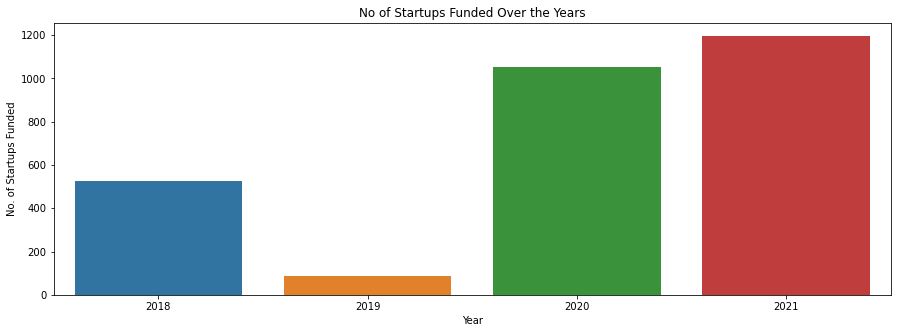

In [93]:
# Number of Start-ups across the years
sns.countplot(all_data['Year'])
plt.xlabel('Year')
plt.ylabel('No. of Startups Funded')
plt.title('No of Startups Funded Over the Years')
matplotlib.rcParams['figure.figsize'] = (15, 5)

This bar graph shows the number of start-ups funded per year, with 2021 having the highest number of startups.

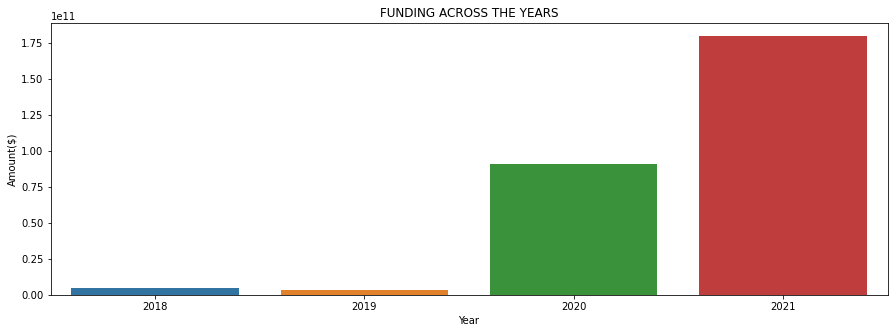

In [137]:
#Here we are looking at the funding across different years. a new dataframe was created just to include amount and year
Totalfunded = pd.DataFrame(Final_data.groupby(by=['Year'])['Amount($)'].sum().sort_values(ascending=False))
Totalfunded
#Totalfunded.rename(columns={"Amount($)":"Total Funding(USD-Bn)"}, inplace=True)
#Totalfunded = .sort_values(by='Total Funding(USD-Bn)', ascending=False)
sns.barplot(x=Totalfunded.index, y=Totalfunded['Amount($)'], data=Totalfunded)
plt.title('FUNDING ACROSS THE YEARS')
matplotlib.rcParams['figure.figsize'] = (10, 5)

The total amount of funding was lowest 2019 but moved up continuously from 2020 to 2021

In [44]:
#Final_data.isnull().sum()

# 2. What Sectors Receives the Most Funding

In [45]:
#Final_data.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).head(5).plot(kind='bar',xlabel='Sector',ylabel='Amount invested',title:'Top 5 Sectors by Funding')

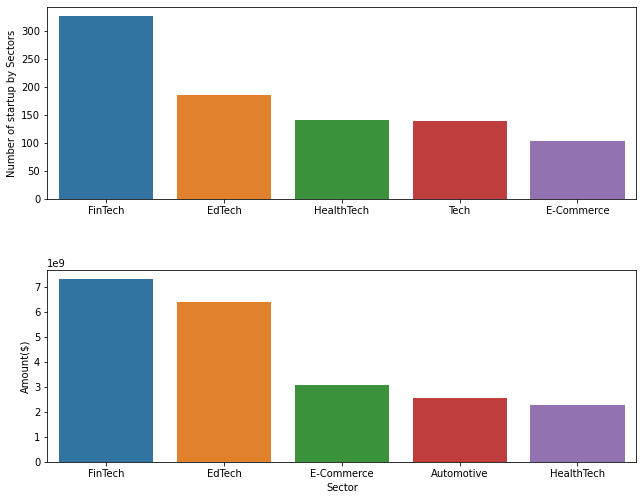

In [140]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
fig.tight_layout(pad=5.0)

Sector_Count=pd.DataFrame(Real_data['Sector'].value_counts().sort_values(ascending=False).head(5))
Sector_Count.rename(columns={'Sector':'Number of startup by Sectors'}, inplace=True)
Sector_Total=pd.DataFrame(Real_data.groupby(['Sector'])['Amount($)'].sum().sort_values(ascending=False).head(5))

sns.barplot(x=Sector_Count.index, y=Sector_Count['Number of startup by Sectors'], data=Sector_Count, ax=axes[0])
sns.barplot(x=Sector_Total.index, y=Sector_Total['Amount($)'], data=Sector_Total, ax=axes[1])#.set_xticklabels(rotation=90, labels=funding_total_city.index)

plt.show()

from both plots shown, the sectors that receives more funding are Fintechs, Edtechs,Tech,E-Commerce. Most of the startups venture into these sectors and receives more funding than other sectors. 

# 2. Does location affect funding


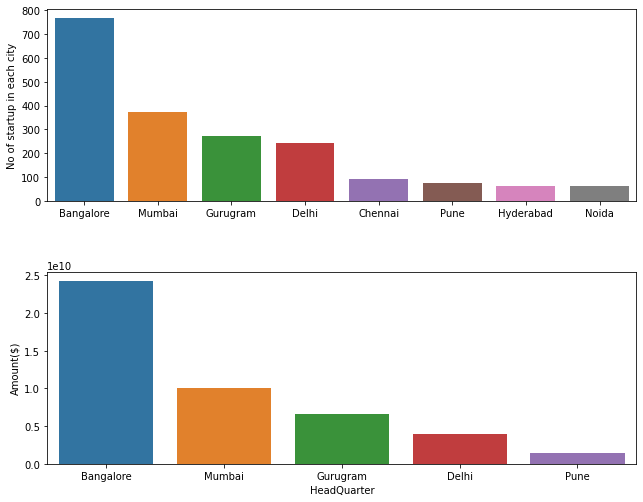

In [141]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
fig.tight_layout(pad=5.0)

Location_Count=pd.DataFrame(Real_data['HeadQuarter'].value_counts().sort_values(ascending=False).head(8))
Location_Count.rename(columns={'HeadQuarter':'No of startup in each city'}, inplace=True)
Location_Total=pd.DataFrame(Real_data.groupby(['HeadQuarter'])['Amount($)'].sum().sort_values(ascending=False).head(5))

sns.barplot(x=Location_Count.index, y=Location_Count['No of startup in each city'], data=Location_Count, ax=axes[0])
sns.barplot(x=Location_Total.index, y=Location_Total['Amount($)'], data=Location_Total, ax=axes[1])#.set_xticklabels(rotation=90, labels=funding_total_city.index)

plt.show()

Bangalore has the most start-up and funding, it is why it is regarded as the silicon valley of india. Most of the start-ups resides in first 4 location as seen in the bar chart shown and also have more funding.

# 3.  Most Important Investors  

<AxesSubplot:title={'center':'MOST IMPORTANT INVESTORS'}>

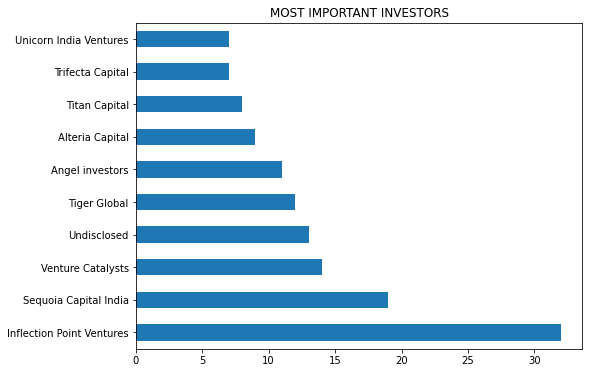

In [143]:
Real_data['Investor'].value_counts().head(10).sort_values(ascending=False).plot(kind='barh',title='MOST IMPORTANT INVESTORS',figsize=(8,6))

Inflection Point Ventures and Sequoia Capital India are the two most important investors as they have funded more start-ups with their investments.

# 4. Stage of Investment with highest Funding

In [122]:
#What stage of investment has the highest funding
Real_data.groupby(['Stage'])['Amount($)'].sum().sort_values(ascending=False).head(10)

Stage
Series C          4.860558e+09
Series B          3.730934e+09
Series D          3.473022e+09
Series E          3.410741e+09
Series A          2.649194e+09
Series H          2.312500e+09
Series F          1.703200e+09
Private Equity    1.634431e+09
Seed              9.465429e+08
Debt Financing    7.123980e+08
Name: Amount($), dtype: float64

C:\Users\emman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


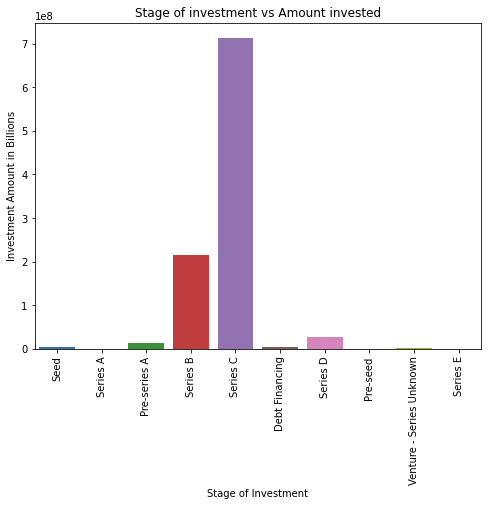

In [147]:
#StageAmount=pd.DataFrame(Final_data.groupby(['Stage'])['Amount($)'].sum().sort_values(ascending=False).head(10))
invest_amount=list(Real_data.groupby(Real_data['Stage']).sum()['Amount($)'])[:10]
typeof_invest = Real_data['Stage'].value_counts()[:10].index
sns.barplot(typeof_invest,invest_amount).set_xticklabels(rotation=90, labels=typeof_invest)
plt.xlabel('Stage of Investment')
plt.ylabel('Investment Amount in Billions')
plt.title('Stage of investment vs Amount invested')
matplotlib.rcParams['figure.figsize'] = (10,8)

<AxesSubplot:title={'center':'STAGE OF INVESTMENT FOR START-UPS'}>

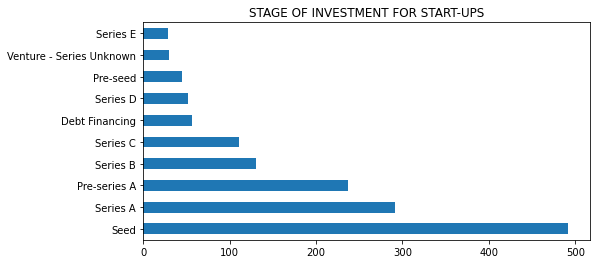

In [150]:
#Most popular stage of investment for start-ups in the indian eco-system
Real_data['Stage'].value_counts().head(10).sort_values(ascending=False).plot(kind='barh',title='STAGE OF INVESTMENT FOR START-UPS',figsize=(8,4))

The seed stage of start-up gets more funding from investors followed by the Series A. This shows that most investors in Indian Start-up ecosystem prefers to invest at an early stage. However, Series C has received the highest total amount of funding in the india from 2018 to 2021

In [127]:
#Final_data.to_csv("C:\\Users\\emman\\Downloads\\Final_data.csv", index=False)
#Real_data.to_csv("C:\\Users\\emman\\Downloads\\Real_data.csv", index=False)
#all_data.to_csv("C:\\Users\\emman\\Downloads\\all_data.csv", index=False)

# SUMMARY AND CONCLUSION

Following our analysis of the datasets we can draw some summary and conclusion about the start-ups in indian between 2018 to 2021:

1. Most of the start-ups in India have technology revolving around them, with most of the start-ups being FINTECHS
2. Location and funding are positively correlated in India. If we reside our start-up in Bangalore we have a high tendency of getting funding easily.
3. The more the start-ups, the more funding we should expect in a given year
4. Investors prefer to invest in the seed stage 